In [10]:
import numpy as np
import scipy.io as sio
from sklearn import preprocessing
from keras.models import Model
from copy import deepcopy
from keras.layers import Input,Dense,Flatten,Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPool1D
from keras import optimizers
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import os
import matplotlib.pyplot as plt
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [7]:
temp=sio.loadmat('data_all')
temp=temp['data']
data=[]
for i in range(temp.shape[1]):
    for j in range(temp.shape[2]):
        data.append(temp[:,i,j])
data=np.asarray(data)  

data1=[]
data2=[]
data3=[]
data4=[]
data5=[]
for i in range(4):
    data1.append(data[300*i:300*i+60])
    data2.append(data[300*i+60:300*i+120])
    data3.append(data[300*i+120:300*i+180])
    data4.append(data[300*i+180:300*i+240])
    data5.append(data[300*i+240:300*i+300])
data1=np.reshape(np.asarray(data1),(240,10000))
data2=np.reshape(np.asarray(data2),(240,10000))
data3=np.reshape(np.asarray(data3),(240,10000))
data4=np.reshape(np.asarray(data4),(240,10000))
data5=np.reshape(np.asarray(data5),(240,10000))
data=np.concatenate((data1,data2,data3,data4,data5))

label=np.zeros((1200,1))
label[:240]=0
label[240:480]=1
label[480:720]=2
label[720:960]=3
label[960:1200]=4

label=to_categorical(label)

def wgn(x, snr):
    xpower = np.sum(x**2)/len(x)
    npower = xpower * snr
    return np.sqrt(npower)

nsr=np.asarray(list(range(21)))
acc5=[]


In [8]:
#add noise 
for ratio in nsr:
    print ('the ratio is:', ratio)
    data2=deepcopy(data)
    for index in range(data2.shape[0]):
        data2[index,:]=(data2[index,:].reshape(1,-1)+wgn(data2[index,:], ratio/100)*np.random.randn(1,data2.shape[1]))

    x_train,x_test,y_train,y_test=train_test_split(data2,label,test_size=0.1,random_state=40)

    scaler= preprocessing.StandardScaler().fit(x_train)
    x_train=scaler.transform(x_train)
    x_test=scaler.transform(x_test)
    x_train=np.expand_dims(x_train,axis=2)
    x_test=np.expand_dims(x_test,axis=2)

    input=Input(shape=(10000,1))
    conv1=Conv1D(64,kernel_size=1000,strides=50,activation='relu')(input)
    pool1=MaxPool1D(pool_size=2)(conv1)
    conv2=Conv1D(64,kernel_size=2,activation='relu')(pool1)
    pool2=MaxPool1D(pool_size=2)(conv2)

    flat1=Flatten(name='flatten')(pool1)

    dense2=Dense(500,activation='relu')(flat1)
    output=Dense(5,activation='softmax',name='result')(dense2)
    model=Model(inputs=input,outputs=output)

    optimizer = optimizers.adam(lr=0.001)
    model.compile(
            loss='categorical_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])
    model.summary()
    hist=model.fit(x_train,y_train, epochs=50,validation_data=(x_test,y_test))
    acc5.append(hist.history['val_acc'][-1])
    del data2
    del x_train
    del x_test
    del hist
    

the ratio is: 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 10000, 1)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 181, 64)           64064     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 90, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 5760)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               2880500   
_________________________________________________________________
result (Dense)               (None, 5)                 2505      
Total params: 2,947,069
Trainable params: 2,947,069
Non-trainable params: 0
__________________________________________________

Epoch 50/50
1080/1080 [==============================] - 0s 149us/step - loss: 9.6970e-06 - acc: 1.0000 - val_loss: 1.4642e-05 - val_acc: 1.0000
the ratio is: 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 10000, 1)          0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 181, 64)           64064     
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 90, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 5760)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               2880500   
_________________________________________________________________
result (Dense)               (None, 5)         

Epoch 50/50
1080/1080 [==============================] - 0s 147us/step - loss: 5.4947e-05 - acc: 1.0000 - val_loss: 0.0222 - val_acc: 0.9917
the ratio is: 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 10000, 1)          0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 181, 64)           64064     
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 90, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 5760)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 500)               2880500   
_________________________________________________________________
result (Dense)               (None, 5)             

1080/1080 [==============================] - 0s 184us/step - loss: 6.0732e-05 - acc: 1.0000 - val_loss: 0.0538 - val_acc: 0.9833
the ratio is: 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 10000, 1)          0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 181, 64)           64064     
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 90, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 5760)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 500)               2880500   
_________________________________________________________________
result (Dense)               (None, 5)                 2505    

1080/1080 [==============================] - 0s 158us/step - loss: 5.2741e-05 - acc: 1.0000 - val_loss: 0.2011 - val_acc: 0.9333
the ratio is: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 10000, 1)          0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 181, 64)           64064     
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 90, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 5760)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 500)               2880500   
_________________________________________________________________
result (Dense)               (None, 5)                 2505    

1080/1080 [==============================] - 0s 151us/step - loss: 4.5593e-05 - acc: 1.0000 - val_loss: 0.3912 - val_acc: 0.8250
the ratio is: 7
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 10000, 1)          0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 181, 64)           64064     
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 90, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 5760)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 500)               2880500   
_________________________________________________________________
result (Dense)               (None, 5)                 2505    

1080/1080 [==============================] - 0s 210us/step - loss: 6.9323e-05 - acc: 1.0000 - val_loss: 0.3500 - val_acc: 0.8917
the ratio is: 9
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 10000, 1)          0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 181, 64)           64064     
_________________________________________________________________
max_pooling1d_23 (MaxPooling (None, 90, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 5760)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 500)               2880500   
_________________________________________________________________
result (Dense)               (None, 5)                 2505    

1080/1080 [==============================] - 0s 193us/step - loss: 8.5275e-05 - acc: 1.0000 - val_loss: 0.4290 - val_acc: 0.8333
the ratio is: 11
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 10000, 1)          0         
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 181, 64)           64064     
_________________________________________________________________
max_pooling1d_27 (MaxPooling (None, 90, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 5760)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 500)               2880500   
_________________________________________________________________
result (Dense)               (None, 5)                 2505   

1080/1080 [==============================] - 0s 215us/step - loss: 7.5336e-05 - acc: 1.0000 - val_loss: 0.5214 - val_acc: 0.7917
the ratio is: 13
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 10000, 1)          0         
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 181, 64)           64064     
_________________________________________________________________
max_pooling1d_31 (MaxPooling (None, 90, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 5760)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 500)               2880500   
_________________________________________________________________
result (Dense)               (None, 5)                 2505   

1080/1080 [==============================] - 0s 173us/step - loss: 4.9844e-05 - acc: 1.0000 - val_loss: 0.6654 - val_acc: 0.7083
the ratio is: 15
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 10000, 1)          0         
_________________________________________________________________
conv1d_35 (Conv1D)           (None, 181, 64)           64064     
_________________________________________________________________
max_pooling1d_35 (MaxPooling (None, 90, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 5760)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 500)               2880500   
_________________________________________________________________
result (Dense)               (None, 5)                 2505   

1080/1080 [==============================] - 0s 188us/step - loss: 2.1300e-05 - acc: 1.0000 - val_loss: 1.3793 - val_acc: 0.6000
the ratio is: 17
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        (None, 10000, 1)          0         
_________________________________________________________________
conv1d_39 (Conv1D)           (None, 181, 64)           64064     
_________________________________________________________________
max_pooling1d_39 (MaxPooling (None, 90, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 5760)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 500)               2880500   
_________________________________________________________________
result (Dense)               (None, 5)                 2505   

1080/1080 [==============================] - 0s 195us/step - loss: 9.8546e-05 - acc: 1.0000 - val_loss: 0.8008 - val_acc: 0.6500
the ratio is: 19
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 10000, 1)          0         
_________________________________________________________________
conv1d_43 (Conv1D)           (None, 181, 64)           64064     
_________________________________________________________________
max_pooling1d_43 (MaxPooling (None, 90, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 5760)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 500)               2880500   
_________________________________________________________________
result (Dense)               (None, 5)                 2505   

1080/1080 [==============================] - 0s 208us/step - loss: 6.7059e-05 - acc: 1.0000 - val_loss: 1.0746 - val_acc: 0.5667


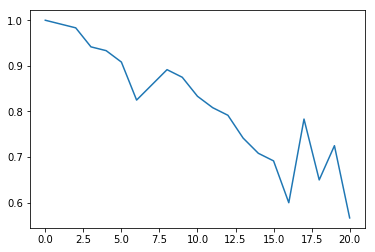

In [12]:
plt.plot(acc5)
sio.savemat('acc5.mat',{'nsr':nsr,'acc5':acc5})

In [13]:
sio.loadmat('acc5.mat')['acc5']


array([[1.        , 0.99166667, 0.98333333, 0.94166667, 0.93333333,
        0.90833333, 0.825     , 0.85833333, 0.89166667, 0.875     ,
        0.83333333, 0.80833333, 0.79166666, 0.74166667, 0.70833333,
        0.69166666, 0.6       , 0.78333333, 0.65      , 0.725     ,
        0.56666667]])